**Unstructured Data Analytics: Group Assignment #2**

# Group Members:
1. Rithu Anand Krishnan
2. Manvi Mahajan
3. Paul Wen (Yilin Wen)
4. Alex Yu
5. Judy Chen (Yu-Ting Chen)

In [4]:
## Imports
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Task A: 

Read in scraped data and replace top 5 biggest cities in PA with "big city" and concatenate to tweet

In [6]:
#Created dataframe from scraped tweets
df = pd.read_csv("tweetsv3.csv", names=["username", "location", "text"])

In [8]:
df = df.fillna('NA')
df

,username,location,text
NaN,username,location,text
0.0,AlbertVinh,NA,@JohnFetterman Let's send @DrOz to be our 51st...
1.0,sdmikef,"Right here, right now ...",@DashaBurns @NBCNightlyNews @TODAYshow @NBCNew...
2.0,AlbertVinh,NA,@DrOz Let's send @DrOz to be our 51st Vote in ...
3.0,TheWuhanClan,Fallout Shelter,John Fetterman is a vegetable and not fit for ...
...,...,...,...
5996.0,OnTaskDemocrat,"Pennsylvania, USA",John Fetterman has won the hearts of #philly t...
5997.0,rbgslegacy,🇺🇸,Attn: John Fetterman #FettermanForSenate #Fett...
5998.0,razingarizona,"Tamir factory, Arizona",@lackboys3 Similar story with John Fetterman i...
5999.0,brendankihn,"Washington, DC",Iconic shade #PaSen #2022Elections https://t.c...


In [9]:
#Categorize tweets from top 5 biggest cities in PA, small towns in PA, and not from PA

#Top 5 cities PA tweets
top_5 = ['phil', 'pitts', 'allentown', 'erie', 'reading']

for n in top_5:
    df.loc[df['location'].str.contains(n, case=False), 'text'] = 'big_city_pa ' + df['text']
    df.loc[df['location'].str.contains(n, case=False), 'location'] = n

#Small towns in PA
df.loc[df['location'].str.contains("PA|Penns", case=False), 'text'] = 'small_town_pa ' + df['text']

#Not in PA Tweets
df.loc[~df['text'].str.contains("big_city_pa|small_town_pa", case=False), 'text'] = 'non_PA ' + df['text']


In [10]:
df.head(40)
#df.iloc[175,:]

,username,location,text
NaN,username,location,non_PA text
0.0,AlbertVinh,NA,non_PA @JohnFetterman Let's send @DrOz to be o...
1.0,sdmikef,"Right here, right now ...",non_PA @DashaBurns @NBCNightlyNews @TODAYshow ...
2.0,AlbertVinh,NA,non_PA @DrOz Let's send @DrOz to be our 51st V...
3.0,TheWuhanClan,Fallout Shelter,non_PA John Fetterman is a vegetable and not f...
4.0,AureliusStoic1,"Pennsylvania, USA","small_town_pa You feel for this man, personall..."
5.0,Dsquared75,Arlington VA,non_PA #PASen https://t.co/Mtfp7rDr39
6.0,lxeagle17,"Berkeley, CA",non_PA I don't know what's going to happen in ...
7.0,RussOnPolitics,"New York, NY/Cruise Ship",non_PA This reporter is deservedly getting dra...
8.0,TooHungry2Fxn,"Los Angeles, CA","non_PA sam, you’re not a doctor. please explai..."


## Task B: 

Find 4 key issues mentioned by the public in the tweets

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
import numpy as np

#Tokenize texts in tweets
df['text'] = df['text'].astype(str)
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].str.lower()


#Replace names with Fetterman and Oz
oz = ["droz", "dr.oz","mehmet", "dr.oz","oz's", "oz's"]
fetterman = ["johnfetterman", "john fetterman", "john", "fettermanforsenate", "teamfetterman", "fettermanisthebetterman"]

for n in oz:
    df['text']=df['text'].str.replace(n,"oz")

for n in fetterman:
    df['text']=df['text'].str.replace(n,"fetterman")


df['text_tokens'] = df['text'].apply(lambda x: tokenizer.tokenize(x))


#Remove stopwords
stop_words = set(stopwords.words('english'))
df['text_tokens'] = df['text_tokens'].apply(lambda x: [i for i in x if not i in stop_words])
df['text_tokens'].to_csv('out.csv')

df['text_tokens']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


NaN                                          [non_pa, text]
0.0       [non_pa, fetterman, let, send, oz, 51st, vote,...
1.0       [non_pa, dashaburns, nbcnightlynews, todayshow...
2.0       [non_pa, oz, let, send, oz, 51st, vote, u, sen...
3.0       [non_pa, fetterman, vegetable, fit, office, pa...
                                ...                        
5996.0    [small_town_pa, fetterman, hearts, philly, way...
5997.0    [non_pa, attn, fetterman, fetterman, fetterman...
5998.0    [non_pa, lackboys3, similar, story, fetterman,...
5999.0    [non_pa, iconic, shade, pasen, 2022elections, ...
6000.0    [small_town_pa, think, going, use, coerced, su...
Name: text_tokens, Length: 6002, dtype: object

In [12]:
#Find frequency distribution
all_words = df['text_tokens'].sum()
freq_all_words = nltk.FreqDist(all_words)

#Find top 50 words
top_50 = freq_all_words.most_common(50)
top_50

[('pasen', 6020),
 ('co', 5624),
 ('https', 5599),
 ('non_pa', 4489),
 ('fetterman', 3865),
 ('oz', 3644),
 ('small_town_pa', 1262),
 ('pennsylvania', 896),
 ('pa', 662),
 ('senate', 646),
 ('new', 638),
 ('amp', 571),
 ('campaign', 483),
 ('pagov', 483),
 ('dr', 446),
 ('pasenate', 394),
 ('vote', 328),
 ('race', 309),
 ('like', 304),
 ('gasen', 299),
 ('voters', 289),
 ('one', 277),
 ('papol', 277),
 ('gop', 277),
 ('gt', 270),
 ('ohsen', 267),
 ('candidate', 264),
 ('azsen', 257),
 ('jersey', 256),
 ('big_city_pa', 251),
 ('1', 246),
 ('wisen', 231),
 ('r', 229),
 ('would', 222),
 ('trump', 221),
 ('2', 216),
 ('election', 209),
 ('debate', 205),
 ('people', 205),
 ('3', 204),
 ('poll', 202),
 ('crime', 191),
 ('fec', 190),
 ('senator', 188),
 ('get', 172),
 ('f24', 172),
 ('state', 171),
 ('know', 171),
 ('biden', 169),
 ('us', 169)]

In [13]:
df.head(40)

,username,location,text,text_tokens
NaN,username,location,non_pa text,"[non_pa, text]"
0.0,AlbertVinh,NA,non_pa @fetterman let's send @oz to be our 51s...,"[non_pa, fetterman, let, send, oz, 51st, vote,..."
1.0,sdmikef,"Right here, right now ...",non_pa @dashaburns @nbcnightlynews @todayshow ...,"[non_pa, dashaburns, nbcnightlynews, todayshow..."
2.0,AlbertVinh,NA,non_pa @oz let's send @oz to be our 51st vote ...,"[non_pa, oz, let, send, oz, 51st, vote, u, sen..."
3.0,TheWuhanClan,Fallout Shelter,non_pa fetterman is a vegetable and not fit fo...,"[non_pa, fetterman, vegetable, fit, office, pa..."
4.0,AureliusStoic1,"Pennsylvania, USA","small_town_pa you feel for this man, personall...","[small_town_pa, feel, man, personally, pennsyl..."
5.0,Dsquared75,Arlington VA,non_pa #pasen https://t.co/mtfp7rdr39,"[non_pa, pasen, https, co, mtfp7rdr39]"
6.0,lxeagle17,"Berkeley, CA",non_pa i don't know what's going to happen in ...,"[non_pa, know, going, happen, pasen, race, lea..."
7.0,RussOnPolitics,"New York, NY/Cruise Ship",non_pa this reporter is deservedly getting dra...,"[non_pa, reporter, deservedly, getting, dragge..."
8.0,TooHungry2Fxn,"Los Angeles, CA","non_pa sam, you’re not a doctor. please explai...","[non_pa, sam, doctor, please, explain, differe..."


In [14]:
top_4_issues = ['crime', 'abortion', 'health', 'fraud']

In [15]:
#top_15_words = ['trump','biden','crime','republican','health','media','abortion','women','foreign','turkey','democratic','tax','bidenbordercrisis', 'bidenflation', 'fraud']
top_15_words = [('trump', 210), ('biden', 152), ('crime', 152), ('republican', 138), ('health', 118), ('media', 116), ('abortion', 113), ('women', 111), ('foreign', 91), ('turkey', 81),  ('democratic', 80), ('tax', 76), ('bidenbordercrisis', 59), ('bidenflation', 52), ('fraud', 52)]

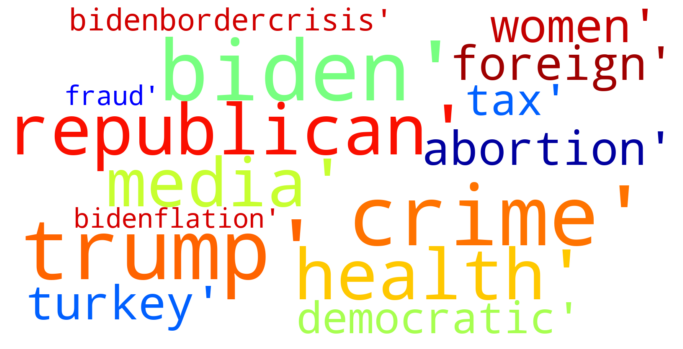

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    AllWords = ''.join(''.join([str(l) for l in wd_list]))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(AllWords)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(top_15_words)

In [17]:
lift_row = ["oz","fetterman",'crime', 'abortion', 'health', 'fraud']

# Calculate Lift value
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

# Lift: features and brands
lift_candidates = pd.DataFrame(columns = ['candidate','issues','lift'])
i=0
for  candidate in lift_row:
    for issue in lift_row:
        temp_lift=calculate_lift(str(candidate), str(issue), df.text_tokens)
        lift_candidates.loc[i]=[str(candidate),str(issue),temp_lift]
        i=i+1
        
df_lift = lift_candidates.sort_values('lift',ascending = False).groupby('candidate').head(10)

# Print the lift matrix
lift_matrix2 = df_lift.pivot(index='candidate', columns='issues')
lift_matrix2

lift                                                  
issues     abortion     crime fetterman     fraud    health        oz
candidate                                                            
abortion          1  1.304216  0.807154  1.068732  3.784363  1.589418
crime      1.304216         1  1.211998       0.0  0.833843  0.749747
fetterman  0.807154  1.211998         1  1.338614    1.6246  1.003081
fraud      1.068732       0.0  1.338614         1  1.822101   1.89702
health     3.784363  0.833843    1.6246  1.822101         1  1.297664
oz         1.589418  0.749747  1.003081   1.89702  1.297664         1

In [2]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


In [18]:
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))

In [19]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [72]:
def senti(df):
    if df['compound'] >= 0.05:
        val = "Positive"
    elif df['compound'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [75]:
df['Comp_score'] = df.apply(senti, axis=1)

In [76]:
df

,username,location,text,text_tokens,scores,compound,comp_score,Sentiment,Comp_score
NaN,username,location,non_pa text,"[non_pa, text]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,Neutral,Neutral
0.0,AlbertVinh,NA,non_pa @fetterman let's send @oz to be our 51s...,"[non_pa, fetterman, let, send, oz, 51st, vote,...","{'neg': 0.061, 'neu': 0.81, 'pos': 0.128, 'com...",0.5255,pos,Positive,Positive
1.0,sdmikef,"Right here, right now ...",non_pa @dashaburns @nbcnightlynews @todayshow ...,"[non_pa, dashaburns, nbcnightlynews, todayshow...","{'neg': 0.072, 'neu': 0.81, 'pos': 0.118, 'com...",0.1779,pos,Positive,Positive
2.0,AlbertVinh,NA,non_pa @oz let's send @oz to be our 51st vote ...,"[non_pa, oz, let, send, oz, 51st, vote, u, sen...","{'neg': 0.061, 'neu': 0.81, 'pos': 0.128, 'com...",0.5255,pos,Positive,Positive
3.0,TheWuhanClan,Fallout Shelter,non_pa fetterman is a vegetable and not fit fo...,"[non_pa, fetterman, vegetable, fit, office, pa...","{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.2755,neg,Negative,Negative
...,...,...,...,...,...,...,...,...,...
5996.0,OnTaskDemocrat,"Pennsylvania, USA",small_town_pa fetterman has won the hearts of ...,"[small_town_pa, fetterman, hearts, philly, way...","{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",0.8402,pos,Positive,Positive
5997.0,rbgslegacy,🇺🇸,non_pa attn: fetterman #fetterman #fetterman #...,"[non_pa, attn, fetterman, fetterman, fetterman...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,Neutral,Neutral
5998.0,razingarizona,"Tamir factory, Arizona",non_pa @lackboys3 similar story with fetterman...,"[non_pa, lackboys3, similar, story, fetterman,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,Neutral,Neutral
5999.0,brendankihn,"Washington, DC",non_pa iconic shade #pasen #2022elections http...,"[non_pa, iconic, shade, pasen, 2022elections, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,Neutral,Neutral


In [30]:
def sentimentIssue(df,issue, candidate, window):
    scores=[]
    for i in df["text_tokens"]:
        if ((issue in i) and (candidate in i)):
            a = ' '.join(e for e in i[i.index(issue)-window:i.index(issue)+window])
            if a != "":
                sentiment_score = analyser.polarity_scores(a)['compound']
                scores.append(sentiment_score)
    return np.mean(scores)

In [32]:
print(sentimentIssue(df,"abortion", "oz", window=10))
print(sentimentIssue(df,"crime", "oz", window=10))
print(sentimentIssue(df,"health", "oz", window=10))
print(sentimentIssue(df,"fraud", "oz", window=10))
print(sentimentIssue(df,"abortion", "fetterman", window=10))
print(sentimentIssue(df,"crime", "fetterman", window=10))
print(sentimentIssue(df,"health", "fetterman", window=10))
print(sentimentIssue(df,"fraud", "fetterman", window=10))

-0.23141020408163263
-0.4299179487179487
-0.009865384615384618
-0.41780689655172415
-0.09433928571428572
-0.3778681818181818
-0.04622549019607843
-0.4415699999999999


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


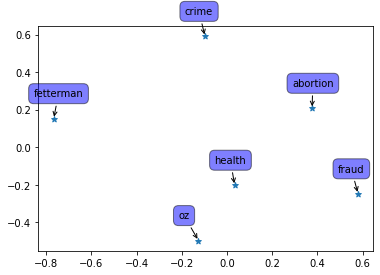

In [33]:
## Calculating the dissimilarity matrix which is the input for plotting MDS plot
lift_matrix2 = lift_matrix2.replace(to_replace = 0.0, value = 1)
# lift_matrix2
dissimilarity_matrix = 1/lift_matrix2
np.fill_diagonal(dissimilarity_matrix.values, 0)

# dissimilarity_matrix

## Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_


plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = '*'
    )
for label, x, y in zip(lift_row, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [34]:
lift_row_town = ["oz","fetterman", "small_town_pa", "big_city_pa"]

# Calculate Lift value
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

# Lift: features and brands
lift_candidates = pd.DataFrame(columns = ['candidate','issues','lift'])
i=0
for  candidate in lift_row_town:
    for issue in lift_row_town:
        temp_lift=calculate_lift(str(candidate), str(issue), df.text_tokens)
        lift_candidates.loc[i]=[str(candidate),str(issue),temp_lift]
        i=i+1
        
df_lift = lift_candidates.sort_values('lift',ascending = False).groupby('candidate').head(10)

# Print the lift matrix
lift_matrix2 = df_lift.pivot(index='candidate', columns='issues')
lift_matrix2

lift                                  
issues        big_city_pa fetterman        oz small_town_pa
candidate                                                  
big_city_pa             1  1.021895  1.382056           0.0
fetterman        1.021895         1  1.003081      1.236102
oz               1.382056  1.003081         1      0.981444
small_town_pa         0.0  1.236102  0.981444             1

In [35]:
print(sentimentIssue(df,"big_city_pa", "oz", window=10))
print(sentimentIssue(df,"big_city_pa", "fetterman", window=10))
print(sentimentIssue(df,"small_town_pa", "oz", window=10))
print(sentimentIssue(df,"small_town_pa", "fetterman", window=10))

0.05496984126984127
0.055028125000000004
0.00268097165991903
0.020333333333333335
